<a href="https://colab.research.google.com/github/st20080675/OCR-collection/blob/main/License_Plate_Detection_and_OCR_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# License Plate Detection and OCR Processing

## packages installation

In [2]:
!pip install pandas==1.5.3 typing-extensions==4.5.0 fastapi kaleido python-multipart uvicorn landingai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastapi to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.

## helper function to obtain online image via url

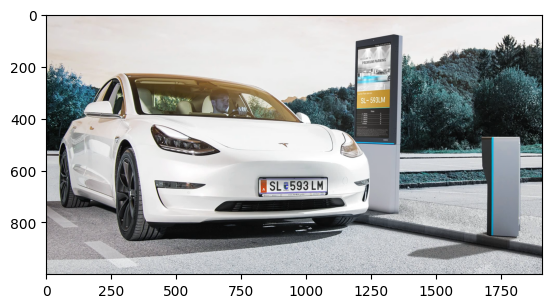

In [24]:
import urllib.request as urllib
import numpy as np
import matplotlib.pyplot as plt
import cv2

url = 'https://www.skidata.com/hubfs/Skidata/Website/Global/Blog/lpr-tesla-license-plate-recognition-1910x1000.jpg#keepProtocol'
# url = 'https://i.etsystatic.com/24843103/r/il/3bd584/3774168167/il_570xN.3774168167_qw8l.jpg'

def image_url_to_numpy_array_urllib(url,format=None):
    ## read as HTTPResponse
    resp = urllib.urlopen(url)
    ## read as 1D bytearray
    resp_byte_array = resp.read()
    ## returns a bytearray object which is a mutable sequence of integers in the range 0 <=x< 256
    mutable_byte_array = bytearray(resp_byte_array)
    ## read as unsigned integer 1D numpy array
    image = np.asarray(mutable_byte_array, dtype="uint8")
    ## To decode the 1D image array into a 2D format with RGB color components we make a call to cv2.imdecode
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if format=='BGR' :
        ## return BGR format array
        return image
    ## cv2.imdecode converted array into BGR format , convert it to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # return the image
    return image

img =image_url_to_numpy_array_urllib(url=url,format='BGR')
plt.imshow(img)

## conduct license plate detection

In [6]:
from landingai.predict import Predictor
from landingai import visualize

[ObjectDetectionPrediction(score=0.9691886901855469, label_name='number_plate', label_index=1, id='bd77e40b-0601-4653-9091-886ff0ddc283', bboxes=(816, 619, 1095, 704))]


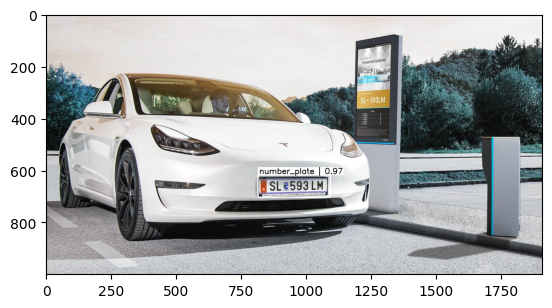

In [25]:
api_key = "land_sk_aMemWbpd41yXnQ0tXvZMh59ISgRuKNRKjJEIUHnkiH32NBJAwf"
model_endpoint = "e001c156-5de0-43f3-9991-f19699b31202"
predictor = Predictor(model_endpoint, api_key=api_key)

bodx = predictor.predict(img)
overlay = visualize.overlay_predictions(bodx, img)

print(bodx)
plt.imshow(overlay)



## crop the plate and OCR processing

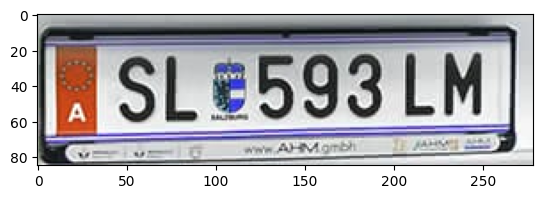

In [26]:
from landingai.postprocess import crop
import numpy as np

cropped_img = crop(bodx, img)
plt.imshow(np.array(cropped_img[0]))


In [28]:
from landingai.predict import OcrPredictor

# NOTE: below key has a rate limit, set to your own API key for production use.
API_KEY = "land_sk_WVYwP00xA3iXely2vuar6YUDZ3MJT9yLX6oW5noUkwICzYLiDV"
ocr_predictor = OcrPredictor(api_key=API_KEY)

ocr_pred = ocr_predictor.predict(cropped_img[0])
print(ocr_pred)

[OcrPrediction(score=0.6036992073059082, text='AHMotb', location=[(137, 71), (176, 71), (176, 80), (137, 80)]), OcrPrediction(score=0.8980453610420227, text='SLE593LM', location=[(37, 22), (254, 19), (255, 62), (37, 65)])]
